In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read in CDFS main data
data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data) # 30,911 galaxies
df = df[df['Use'] == 1] # 13,299 galaxies

In [31]:
c = 3.e5  # km/s
h0 = 70   # km/s/Mpc
dist = df['z']*c/h0  # distance in Mpc
zmin = 0
zmax = 1.0

In [32]:
frest = df['FK']
rab = 25 - 2.5*np.log10(frest) # AB magnitude
print(rab)

5745     22.528291
5859     21.775164
5863     22.430403
5879     23.498997
5885     23.709508
           ...    
30860    25.434980
30872    24.093323
30905    25.115062
30907    22.222096
30909    26.083311
Name: FK, Length: 13299, dtype: float64


Text(0, 0.5, 'Number of galaxies')

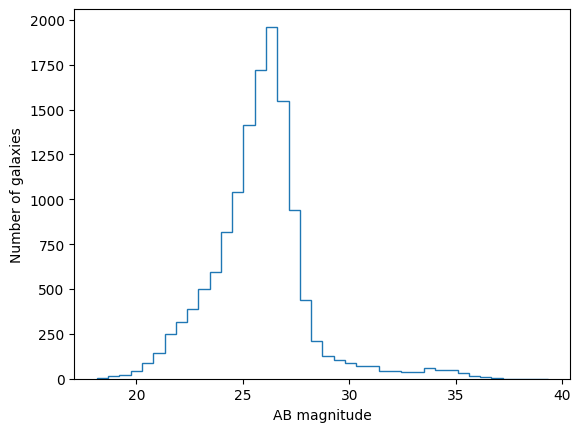

In [33]:
out = plt.hist(rab, bins=40, histtype='step')
# plt.yscale('log')
plt.xlabel('AB magnitude')
plt.ylabel('Number of galaxies')

[2.34565130e+06 1.83824013e+06 1.44059211e+06 1.12896330e+06
 8.84746017e+05 6.93357803e+05 5.43370678e+05 4.25828760e+05
 3.33713504e+05 2.61524616e+05 2.04951624e+05 1.60616499e+05
 1.25871946e+05 9.86433332e+04 7.73048123e+04 6.05822392e+04
 4.74770923e+04 3.72068501e+04 2.91582662e+04 2.28507515e+04
 1.79076781e+04 1.40338901e+04 1.09980797e+04 8.61897563e+03
 6.75451926e+03 5.29338199e+03 4.14831787e+03 3.25095396e+03
 2.54770776e+03 1.99658775e+03 1.56468599e+03 1.22621319e+03
 9.60958816e+02 7.53084254e+02 5.90177106e+02 4.62510024e+02
 3.62459879e+02 2.84052576e+02 2.22606337e+02 1.74452146e+02
 1.36714666e+02]


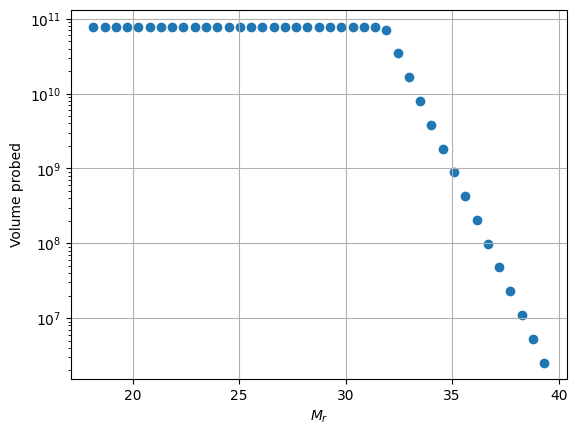

In [37]:
mabs = out[1] # center our histogram bins into mabs
mlim = 25 # apparent magnitude limit of SDSS
dmax = 10 ** ((mlim - mabs - 25) / 5) # use the mlim and mabs to determine the maximum distance
print(dmax)
dmax[dmax>zmax*c/h0] = zmax*c/h0 # set a maximum distance of zmax=0.05 (based on our SQL selection criteria)
dmin = zmin*c/h0 # sets a minimum distance of zmin=0.015 (based on our SQL selection criteria)
vol = (dmax**3-dmin**3) # volume probed as a function of mabs

# Plot the volume probed as a function of mabs
plt.scatter(mabs,vol)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('Volume probed')
plt.grid()